In [49]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
import sklearn
!pip3 install idx2numpy
import idx2numpy
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA

In [66]:
arr_img = idx2numpy.convert_from_file('/content/train-images.idx3-ubyte')
arr_labels = idx2numpy.convert_from_file('/content/train-labels.idx1-ubyte')
arr_img= np.reshape(arr_img,(60000, 784))

In [67]:
pca_15 = PCA(n_components=15)
pca_15.fit(arr_img)


PCA(n_components=15)

In [68]:
arr1 = pca_15.transform(arr_img)
print(len(arr1[0]))

15


In [69]:
clf = LDA()
clf.fit(arr1, arr_labels)

LinearDiscriminantAnalysis()

In [70]:
arr_img_test = idx2numpy.convert_from_file('/content/t10k-images.idx3-ubyte')
arr_labels_test = idx2numpy.convert_from_file('/content/t10k-labels.idx1-ubyte')
arr_img_test = np.reshape(arr_img_test, (10000, 784))

In [71]:
arr_test = pca_15.transform(arr_img_test)
pred = clf.predict(arr_test)

In [72]:
correct =0
incorrect=0
for i in range(len(pred)):
  if (pred[i] == arr_labels_test[i]):
    correct+=1
  else:
    incorrect+=1
acc_15 = correct*100/(correct+incorrect)
print("Accuracy = "+ str(correct*100/(correct+incorrect)))

Accuracy = 80.37


In [73]:
pca_8 = PCA(n_components = 8)
pca_8.fit(arr_img)

PCA(n_components=8)

In [74]:
arr1 = pca_8.transform(arr_img)
clf.fit(arr1, arr_labels)
arr_test = pca_8.transform(arr_img_test)
pred = clf.predict(arr_test)
correct =0
incorrect=0
for i in range(len(pred)):
  if (pred[i] == arr_labels_test[i]):
    correct+=1
  else:
    incorrect+=1
acc_8=correct*100/(correct+incorrect)
print("Accuracy = "+ str(correct*100/(correct+incorrect)))

Accuracy = 76.04


In [75]:
pca_3 = PCA(n_components = 3)
pca_3.fit(arr_img)

PCA(n_components=3)

In [76]:
arr1 = pca_3.transform(arr_img)
clf.fit(arr1, arr_labels)
arr_test = pca_3.transform(arr_img_test)
pred = clf.predict(arr_test)
correct =0
incorrect=0
for i in range(len(pred)):
  if (pred[i] == arr_labels_test[i]):
    correct+=1
  else:
    incorrect+=1
acc_3 = correct*100/(correct+incorrect)
print("Accuracy = "+ str(correct*100/(correct+incorrect)))

Accuracy = 46.6


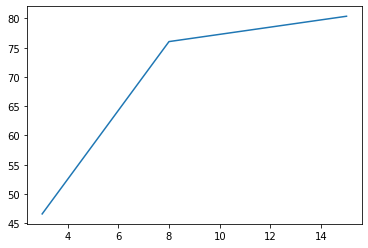

In [77]:
x_axis = [3,8,15]
y_axis = [acc_3, acc_8, acc_15]
plt.plot(x_axis, y_axis)
plt.show()